This notebook and the corresponding collection of functions is for experimenting how to identify the best value of <code>k</code> in k means clustering.

There a problem with my implementation (to be fixed!) but the lines below already summarise the main idea.

In [1]:
import numpy as np
from clustering_easy_k_optimisation import *
import matplotlib.pyplot as plt
%matplotlib inline
m=1000

## Generate data

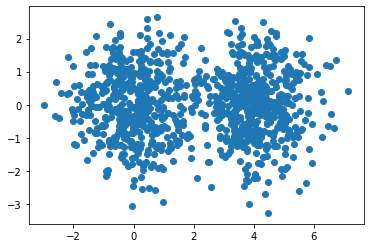

In [2]:
offset = np.zeros((m,2))
x_shift = np.random.choice([0,4], (m,))
offset[:,0] = x_shift
data = sample_from_unit_ball(m, 2, mode='normal') + offset
plt.scatter(data[:,0],data[:,1])

## Clustering

In [3]:
class_dict, vol_dict, dist_sum_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 2
k=3: Stopped clustering after iteration 14
k=4: Stopped clustering after iteration 13
k=5: Warning: reached maximum number of iterations
k=6: Stopped clustering after iteration 29
k=7: Stopped clustering after iteration 13
k=8: Warning: class dropped out
k=9: Warning: class dropped out


In [4]:
vol_dict

{'k=1': 81.68649966100351,
 'k=2': 65.1935100778724,
 'k=3': 78.90232775930939,
 'k=4': 98.25068898772138,
 'k=5': 84.69231570024573,
 'k=6': 82.62163927641066,
 'k=7': 104.8684967771519,
 'k=8': None,
 'k=9': None}

Looking at the volumes suggests that <code>k=2</code> (smallest volume) is the best number of clusters.

Looking at the sum of distances would, for the data set here, suggest to go with bigger values of <code>k</code>.

In [5]:
dist_sum_dict

{'k=1': 2298.810805148762,
 'k=2': 1237.424323989727,
 'k=3': 1100.058528608922,
 'k=4': 973.06922499354,
 'k=5': 894.463923008511,
 'k=6': 818.8159239079264,
 'k=7': 777.3308382386749,
 'k=8': None,
 'k=9': None}

## Visualise results

Text(0.5, 1.0, 'k=1')

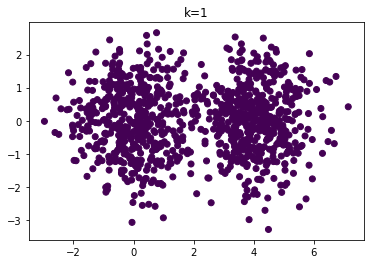

In [6]:
key='k=1'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=2')

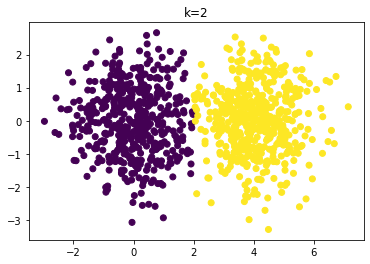

In [7]:
key='k=2'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=3')

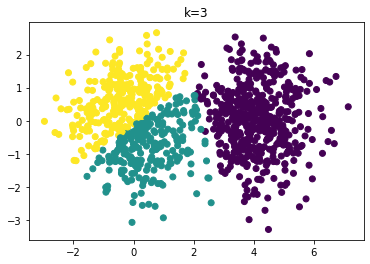

In [8]:
key='k=3'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=4')

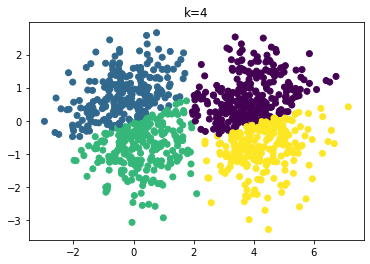

In [9]:
key='k=4'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=5')

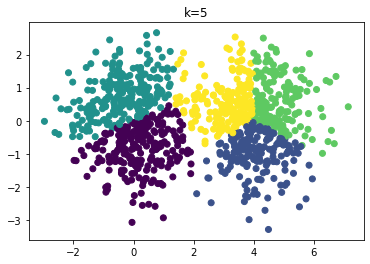

In [10]:
key='k=5'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=6')

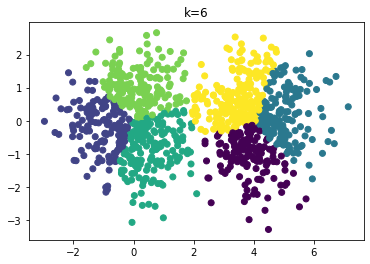

In [11]:
key='k=6'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

## Explanation of 'volume' and conclusion

The metric 'volume' that was used here is simply the sum of the volumes of the disks (in general: n-dimensional balls) centred at the class centres that contain all members of that class. E.g., in the above plots: Two disks containing each of the clusters are the most efficient way to cover all points. One large disk (k=1) would contain too much whitespace and many smaller disks (k>2) have too much overlap.

It seems that the 'volume' used above can help to find the best value for <code>k</code>. However, that probably doesn't always work well -- perhaps only when the groups in the distribution of the data are well-defined. This can be explored below. I'll only demonstrate a case that works well, but other situation can be tried afterwards.

## Another low-dimensional experiment

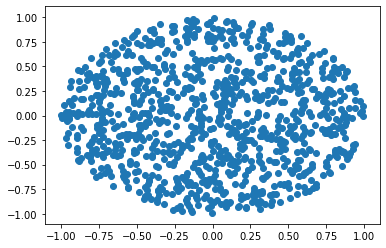

In [12]:
# just to test that sampling is uniform across the disk
data = sample_from_unit_ball(m, 2, mode='uniform')
plt.scatter(data[:,0],data[:,1])

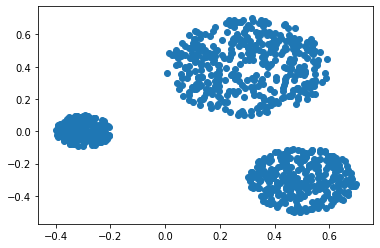

In [13]:
data1 = np.array([[-0.3,0]]) + 0.1 * sample_from_unit_ball(int(m*0.2), 2, mode='uniform')
data2 = np.array([[0.5,-0.3]]) + 0.2 * sample_from_unit_ball(int(m*0.3), 2, mode='uniform')
data3 = np.array([[0.3,0.4]]) + 0.3 * sample_from_unit_ball(int(m*0.4), 2, mode='uniform')
data = np.concatenate((data1, data2, data3), axis=0)
plt.scatter(data[:,0],data[:,1])

In [14]:
class_dict, vol_dict, dist_sum_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 2
k=3: Stopped clustering after iteration 4
k=4: Stopped clustering after iteration 4
k=5: Warning: class dropped out
k=6: Warning: class dropped out
k=7: Warning: class dropped out
k=8: Warning: class dropped out
k=9: Warning: class dropped out


In [15]:
vol_dict

{'k=1': 1.3790842968827741,
 'k=2': 1.456311153405732,
 'k=3': 0.4634872376790088,
 'k=4': 0.7973240953155188,
 'k=5': None,
 'k=6': None,
 'k=7': None,
 'k=8': None,
 'k=9': None}

In [16]:
dist_sum_dict

{'k=1': 397.1194892150287,
 'k=2': 289.32822241741746,
 'k=3': 134.2743679696156,
 'k=4': 116.07689953988795,
 'k=5': None,
 'k=6': None,
 'k=7': None,
 'k=8': None,
 'k=9': None}

Text(0.5, 1.0, 'k=3')

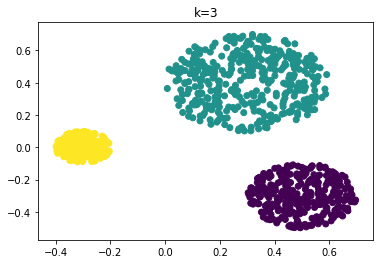

In [17]:
key='k=3'
plt.scatter(data[:,0],data[:,1],c=class_dict[key])
plt.title(key)

But really, this works well only if the clusters are separated well. Luckily, this is more likely to be the case in high dimensions. Now for n = 20

## High-dimensional example

Todo: fix the drop-out problem and then tidy up this last part

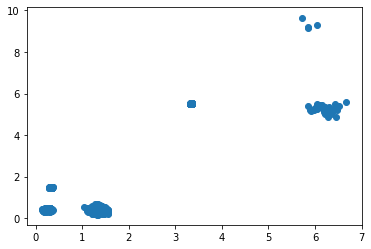

In [18]:
data1 = 10*np.random.rand(1,20) + np.random.rand() * sample_from_unit_ball(int(m*np.random.rand()), 20, mode='uniform')
data2 = 10*np.random.rand(1,20) + np.random.rand() * sample_from_unit_ball(int(m*np.random.rand()), 20, mode='uniform')
data3 = 10*np.random.rand(1,20) + np.random.rand() * sample_from_unit_ball(int(m*np.random.rand()), 20, mode='uniform')
data4 = 10*np.random.rand(1,20) + np.random.rand() * sample_from_unit_ball(int(m*np.random.rand()), 20, mode='uniform')
data5 = 10*np.random.rand(1,20) + np.random.rand() * sample_from_unit_ball(int(m*np.random.rand()), 20, mode='uniform')
data6 = 10*np.random.rand(1,20) + np.random.rand() * sample_from_unit_ball(int(m*np.random.rand()), 20, mode='uniform')
data = np.concatenate((data1, data2, data3, data4, data5, data6), axis=0)
plt.scatter(data[:,0],data[:,1])

In [19]:
class_dict, vol_dict, dist_sum_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 1
k=3: Stopped clustering after iteration 3
k=4: Stopped clustering after iteration 2
k=5: Warning: class dropped out
k=6: Warning: class dropped out
k=7: Warning: class dropped out
k=8: Warning: class dropped out
k=9: Warning: class dropped out


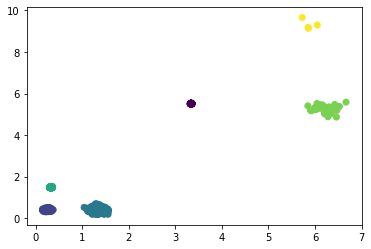

In [20]:
# look up scikit-learn avoids dropping classes
# and then try to fix things
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(data)
plt.scatter(data[:,0],data[:,1],c=kmeans.labels_)